In [64]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

# Generate the data
X, y = make_classification(n_samples=50000, n_features=15, n_informative=10, n_redundant=5, n_classes=2, 
                           weights=[0.7], class_sep=0.7, random_state=15)

X.shape, y.shape

((50000, 15), (50000,))

In [65]:
# Split the data into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((37500, 15), (37500,), (12500, 15), (12500,))

## Logistc Regression with L2 regularization Using SGD: with sklearn

In [66]:
from sklearn import linear_model

# Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

clf = linear_model.SGDClassifier(eta0=0.0001, alpha=0.0001, loss='log', random_state=15, penalty='l2', tol=1e-3, verbose=2, learning_rate='constant')
clf

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0001,
              fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
              loss='log', max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='l2', power_t=0.5, random_state=15, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=2, warm_start=False)

In [67]:
clf.fit(X=X_train, y=y_train)

-- Epoch 1
Norm: 0.77, NNZs: 15, Bias: -0.316653, T: 37500, Avg. loss: 0.455552
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 0.91, NNZs: 15, Bias: -0.472747, T: 75000, Avg. loss: 0.394686
Total training time: 0.04 seconds.
-- Epoch 3
Norm: 0.98, NNZs: 15, Bias: -0.580082, T: 112500, Avg. loss: 0.385711
Total training time: 0.06 seconds.
-- Epoch 4
Norm: 1.02, NNZs: 15, Bias: -0.658292, T: 150000, Avg. loss: 0.382083
Total training time: 0.07 seconds.
-- Epoch 5
Norm: 1.04, NNZs: 15, Bias: -0.719528, T: 187500, Avg. loss: 0.380486
Total training time: 0.10 seconds.
-- Epoch 6
Norm: 1.05, NNZs: 15, Bias: -0.763409, T: 225000, Avg. loss: 0.379578
Total training time: 0.12 seconds.
-- Epoch 7
Norm: 1.06, NNZs: 15, Bias: -0.795106, T: 262500, Avg. loss: 0.379150
Total training time: 0.14 seconds.
-- Epoch 8
Norm: 1.06, NNZs: 15, Bias: -0.819925, T: 300000, Avg. loss: 0.378856
Total training time: 0.16 seconds.
-- Epoch 9
Norm: 1.07, NNZs: 15, Bias: -0.837805, T: 337500, Avg. loss: 0.

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0001,
              fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
              loss='log', max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='l2', power_t=0.5, random_state=15, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=2, warm_start=False)

In [68]:
# weight vector (w) = clf.coef_
# b = clf.intercept_

print("Weight vector (w):")
print(clf.coef_)

print("\nw's shape:")
print(clf.coef_.shape) 

print("\nIntercept (b):")
print(clf.intercept_)

Weight vector (w):
[[-0.42336692  0.18547565 -0.14859036  0.34144407 -0.2081867   0.56016579
  -0.45242483 -0.09408813  0.2092732   0.18084126  0.19705191  0.00421916
  -0.0796037   0.33852802  0.02266721]]

w's shape:
(1, 15)

Intercept (b):
[-0.8531383]


## Implement Logistc Regression with L2 regularization Using SGD: without using sklearn

### Instructions

- Load the datasets(train and test) into the respective arrays

- Initialize the weight_vector and intercept term randomly

- Calculate the initlal log loss for the train and test data with the current weight and intercept and store it in a list

- for each epoch:
    - for each batch of data points in train: (keep batch size=1)
        - calculate the gradient of loss function w.r.t each weight in weight vector
        - Calculate the gradient of the intercept.
        - Update weights and intercept: <br>
        $w^{(t+1)} ← (1 − \frac{αλ}{N} )w^{(t)} + αx_n(y_n − σ((w^{(t)})^{T} x_n+b^{t}))$ <br>
        $b^{(t+1)} ← (b^t +  α(y_n - σ((w^{(t)})^{T} x_n+b^{t}))$ 
        - calculate the log loss for train and test with the updated weights (you can check the python assignment 10th question)
        - And if you wish, you can compare the previous loss and the current loss, if it is not updating, then
        you can stop the training
        - append this loss in the list ( this will be used to see how loss is changing for each epoch after the training is over )


- Plot the train and test loss i.e on x-axis the epoch number, and on y-axis the loss

- <strong>GOAL</strong>: compare your implementation and SGDClassifier's the weights and intercept, make sure they are as close as possible i.e difference should be in terms of 10^-3

# Custom implementation

**1. Load the datasets(train and test) into the respective arrays**

In [69]:
# Already done

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((37500, 15), (37500,), (12500, 15), (12500,))

**2. Initialize the weight_vector and intercept term randomly**

In [70]:
# Make zeros vetor like X_train[0]'s shape
w = np.zeros_like(X_train[0])
b = 0

eta0  = 0.0001 # learning rate r
alpha = 0.0001 # lambda

N = len(X_train)
N

37500

**3. Calculate the initlal log loss for the train and test data with the current weight and intercept and store it in a list**

In [71]:
# please choose the number of iternations on your own

from math import log

# this returns the p(y=1|x) for a single point given w and b
def sigmoid(w, x, b):
    
    z = np.dot(w, x) + b
    return (1 / (1 + np.exp(-z)))

# predicting array of p(y=1|x) with sigmoid function given w and b
def predict(w, x, b):
    
    predicted_prob = []
    for i in range(len(x)):
        predicted_prob.append(sigmoid(w, x[i], b))
    return np.array(predicted_prob)

# average log-loss = log-loss of all points / number of points
def logloss(true_label, predicted, eps=1e-15):
    
    # p is a squashed array between the interval of (tends to 0 value, tends to 1 value)
    p = np.clip(predicted, eps, 1 - eps)
    log_loss = 0
    
    for i in range(len(true_label)):
        
        if true_label[i] == 1:
            log_loss = log_loss - log(p[i])
        else:
            log_loss = log_loss - log(1 - p[i])
            
    return log_loss/len(true_label)
    
# predicting y-values for X_train
y_train_pred = predict(w, X_train, b)

# calculating log-loss for training data and appending into a list "train_loss"
train_loss = []
train_loss.append(logloss(y_train, y_train_pred))

print("Log-loss on train data given initial w and b:")
print(train_loss[0])

# predicting y-values for X_test
y_test_pred = predict(w, X_test, b)

test_loss = []
test_loss.append(logloss(y_test, y_test_pred))

print("Log-loss on test data given initial w and b:")
print(test_loss[0])

Log-loss on train data given initial w and b:
0.6931471805594285
Log-loss on test data given initial w and b:
0.6931471805600672


**4. For each epoch calculate train and test log-loss**

In [73]:
import random

# epoch size = 75
for epoch in range(75):
    for i in range(N):
        # batch-size = 1
        batch = random.randrange(0,N)
        
        w = (( 1 - ( (alpha*eta0)/N) ) * w ) + ( (alpha*X_train[batch]) * ( y_train[batch] - sigmoid(w, X_train[batch], b) ) )
        b = (b - ( alpha * ( -(y_train[batch]) + sigmoid(w, X_train[batch], b) ) ))
        
    # predicting y-values for X_train for given w and b
    y_train_pred = predict(w, X_train, b)
    # calculating log-loss for training data and appending into a list "train_loss"
    loss1 = logloss(y_train, y_train_pred)
    train_loss.append(loss1)
    
    # predicting y-values for X_test for given w and b
    y_test_pred = predict(w, X_test, b)
    # calculating log-loss for test  data and appending into a list "test_loss"
    loss2 = logloss(y_test, y_test_pred)
    test_loss.append(loss2)
    
    print("-- Epoch {0} -- train-loss: {1}, test-loss: {2}".format(epoch, loss1, loss2))
    
print("done")

-- Epoch 0 -- train-loss: 0.3784137874539846, test-loss: 0.38085293961516664
-- Epoch 1 -- train-loss: 0.3784918445623772, test-loss: 0.38059094528831733
-- Epoch 2 -- train-loss: 0.3781712700704728, test-loss: 0.3803897118951291
-- Epoch 3 -- train-loss: 0.37836270477597234, test-loss: 0.3802364292304508
-- Epoch 4 -- train-loss: 0.37838905804698386, test-loss: 0.38067573754907025
-- Epoch 5 -- train-loss: 0.3783483716428948, test-loss: 0.38062017626725764
-- Epoch 6 -- train-loss: 0.37836051660695386, test-loss: 0.3807462133514127
-- Epoch 7 -- train-loss: 0.37827217378901906, test-loss: 0.3806185619541498
-- Epoch 8 -- train-loss: 0.37864712446262566, test-loss: 0.3812287234301546
-- Epoch 9 -- train-loss: 0.37820612174363943, test-loss: 0.38020282085051943
-- Epoch 10 -- train-loss: 0.3791249305978605, test-loss: 0.3809636816736647
-- Epoch 11 -- train-loss: 0.3782184497127133, test-loss: 0.3803135253689085
-- Epoch 12 -- train-loss: 0.3784386432307199, test-loss: 0.380655358950014

**5. Plot the train and test loss i.e on x-axis the epoch number, and on y-axis the loss**

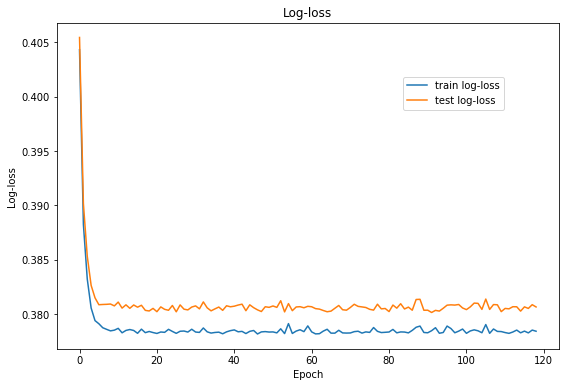

In [74]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(9,6))

plt.plot(train_loss[1:], label="train log-loss")
plt.plot(test_loss[1:], label="test log-loss")

plt.xlabel("Epoch")
plt.ylabel("Log-loss")
plt.legend(loc="upper right", bbox_to_anchor=(0.9,0.85))
plt.title("Log-loss")

plt.show()


**6. Comparing custom implemened's and SGDClassifier's weights and intercept:**

In [75]:
# these are the results we got after we implemented sgd and found the optimal weights and intercept
w-clf.coef_, b-clf.intercept_

(array([[-0.00645603, -0.00111687, -0.00830812,  0.00063956, -0.01971493,
          0.00801469,  0.01433685,  0.00801837,  0.00261959, -0.00248992,
          0.00303087, -0.00132354, -0.01133637, -0.01181596,  0.01195003]]),
 array([-0.03730264]))

**7. Accuracy on final w and b**

In [76]:
# in the last, for calculating the accuracy score with optimal w and b

def pred(w, b, X):
    N = len(X)
    predict = []
    for i in range(N):
        if sigmoid(w, X[i], b) >= 0.5: # sigmoid(w,x,b) returns 1/(1+exp(-(dot(x,w)+b)))
            predict.append(1)
        else:
            predict.append(0)
    return np.array(predict)

print("Accuracy on train data:")
print(1-np.sum(y_train - pred(w,b,X_train))/len(X_train))

print("Accuracy on test data:")
print(1-np.sum(y_test  - pred(w,b,X_test))/len(X_test))

Accuracy on train data:
0.9499466666666667
Accuracy on test data:
0.94856
